In [2]:
from datetime import datetime
import pandas as pd
import numpy as np

In [3]:
retail = pd.read_csv('online_retail2.csv')
retail.shape

(1067371, 8)

In [4]:
retail = retail.drop_duplicates().dropna(axis=0,how='any')

In [5]:
retail.shape

(797885, 8)

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [7]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['InvoiceDate']

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 797885, dtype: datetime64[ns]

In [8]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


In [9]:
retail['InvoiceDate'].dt.year

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: InvoiceDate, Length: 797885, dtype: int32

In [10]:
retail['InvoiceDate'].dt.month

0          12
1          12
2          12
3          12
4          12
           ..
1067366    12
1067367    12
1067368    12
1067369    12
1067370    12
Name: InvoiceDate, Length: 797885, dtype: int32

In [11]:
retail['InvoiceDate'].dt.isocalendar().week

0          49
1          49
2          49
3          49
4          49
           ..
1067366    49
1067367    49
1067368    49
1067369    49
1067370    49
Name: week, Length: 797885, dtype: UInt32

In [12]:
retail['InvoiceDate'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
1067366    9
1067367    9
1067368    9
1067369    9
1067370    9
Name: InvoiceDate, Length: 797885, dtype: int32

In [13]:
retail['InvoiceDate']

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 797885, dtype: datetime64[ns]

In [14]:
retail['InvoiceDate'].dt.strftime('%B %Y')

0          December 2009
1          December 2009
2          December 2009
3          December 2009
4          December 2009
               ...      
1067366    December 2011
1067367    December 2011
1067368    December 2011
1067369    December 2011
1067370    December 2011
Name: InvoiceDate, Length: 797885, dtype: object

In [15]:
retail['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [16]:
retail['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [17]:
retail['InvoiceDate'].max()-retail['InvoiceDate'].min()

Timedelta('738 days 05:05:00')

In [18]:
### recency of purchase (how long from the last purchase until now)

## max date of dataset
max_date = retail['InvoiceDate'].max()

In [19]:
last_purchase_date = retail.groupby(by='Customer ID',as_index=False)['InvoiceDate'].max()

In [20]:
last_purchase_date['Recency']= max_date - last_purchase_date['InvoiceDate']

In [21]:
last_purchase_date.Recency.describe()

count                           5942
mean     202 days 10:33:55.930663076
std      211 days 21:00:52.495651984
min                  0 days 00:00:00
25%                 24 days 01:41:45
50%                 95 days 12:20:00
75%                380 days 22:12:00
max                738 days 02:55:00
Name: Recency, dtype: object

In [22]:
last_purchase_date['Recency_days']=last_purchase_date['Recency'].dt.components['days']

In [23]:
import matplotlib.pyplot as plt

(array([1012.,  683.,  417.,  326.,  274.,  197.,  110.,  116.,   84.,
          90.,   95.,   93.,   88.,   72.,   79.,   61.,   70.,   81.,
          76.,   54.,   56.,   68.,   42.,   13.,   74.,  159.,  145.,
         131.,  132.,   98.,   64.,   67.,   51.,   43.,   47.,   43.,
          58.,   42.,   49.,   52.,   59.,   41.,   57.,   39.,   38.,
          39.,   49.,    8.,   19.,   81.]),
 array([  0.  ,  14.76,  29.52,  44.28,  59.04,  73.8 ,  88.56, 103.32,
        118.08, 132.84, 147.6 , 162.36, 177.12, 191.88, 206.64, 221.4 ,
        236.16, 250.92, 265.68, 280.44, 295.2 , 309.96, 324.72, 339.48,
        354.24, 369.  , 383.76, 398.52, 413.28, 428.04, 442.8 , 457.56,
        472.32, 487.08, 501.84, 516.6 , 531.36, 546.12, 560.88, 575.64,
        590.4 , 605.16, 619.92, 634.68, 649.44, 664.2 , 678.96, 693.72,
        708.48, 723.24, 738.  ]),
 <BarContainer object of 50 artists>)

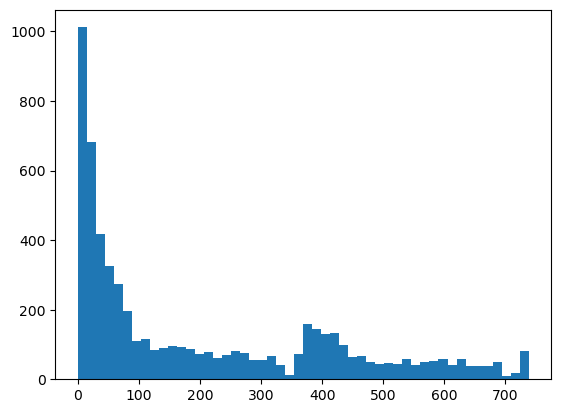

In [24]:
plt.hist(last_purchase_date['Recency_days'],bins=50)

In [25]:
### modeling

customers = retail['Customer ID'].unique()
len(customers)

5942

In [26]:
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [27]:
customer_grouped = retail.groupby(by = ['Customer ID','date'],as_index=False).count()[['Customer ID','date']]

In [28]:
inter_data = pd.DataFrame()

for customer in customers:
    c_d = customer_grouped[customer_grouped['Customer ID'] == customer]
    c_d['previous_date']=c_d['date'].shift(1)
    inter_data = pd.concat([inter_data, c_d], axis = 0)

C:\Users\thanh\AppData\Local\Temp\ipykernel_16896\4052903248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_d['previous_date']=c_d['date'].shift(1)
C:\Users\thanh\AppData\Local\Temp\ipykernel_16896\4052903248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_d['previous_date']=c_d['date'].shift(1)
C:\Users\thanh\AppData\Local\Temp\ipykernel_16896\4052903248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [29]:
inter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38502 entries, 5056 to 2350
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    38502 non-null  float64
 1   date           38502 non-null  object 
 2   previous_date  32560 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [30]:
inter_data['date'] = pd.to_datetime(inter_data['date'])
inter_data['previous_date'] = pd.to_datetime(inter_data['previous_date'])


In [31]:
inter_data['duration']=inter_data['date']-inter_data['previous_date']

inter_data['duration']=inter_data['duration'].dt.components['days']

In [32]:
inter_arrival = inter_data.groupby('Customer ID')['duration'].mean()

In [33]:
inter_arrival

Customer ID
12346.0     40.000000
12347.0     57.428571
12348.0     90.750000
12349.0    179.250000
12350.0           NaN
              ...    
18283.0     36.388889
18284.0      2.000000
18285.0           NaN
18286.0    123.500000
18287.0    116.000000
Name: duration, Length: 5942, dtype: float64

In [34]:
stocks = pd.read_csv('stocks.csv', index_col = 'Date', parse_dates = True)
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [35]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3521 non-null   float64
 1   IBM     3521 non-null   float64
 2   CSCO    3521 non-null   float64
 3   MSFT    3521 non-null   float64
dtypes: float64(4)
memory usage: 137.5 KB


<Axes: xlabel='Date'>

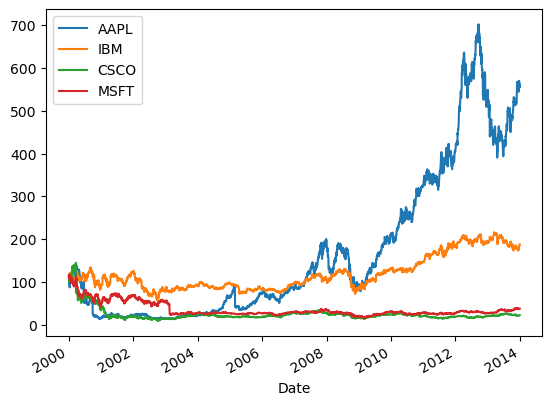

In [36]:
stocks.plot()

<Axes: xlabel='Date'>

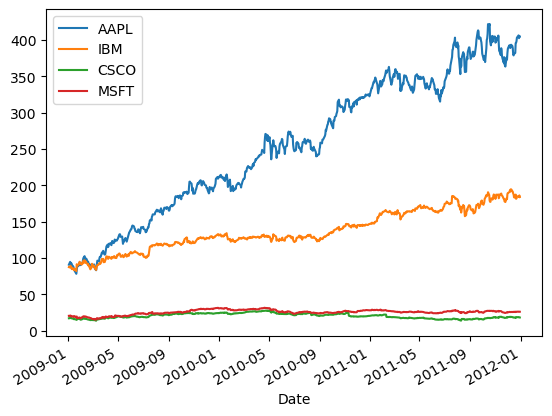

In [37]:
stocks['2009':'2011'].plot()

In [38]:
monthly_series_mean = stocks.resample('M').mean()
monthly_series_mean

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-31,103.359375,116.818750,107.590625,107.115625
2000-02-29,111.638281,113.237500,127.730469,99.300000
2000-03-31,128.502717,111.527174,117.514946,99.815217
2000-04-30,123.105263,114.154605,68.007401,79.009868
2000-05-31,100.810368,107.687500,59.800426,67.071023
...,...,...,...,...
2013-08-31,484.843635,187.125000,24.948636,32.485000
2013-09-30,480.184499,188.767000,24.080000,32.523500
2013-10-31,504.744783,180.710002,22.847391,34.382174


<Axes: xlabel='Date'>

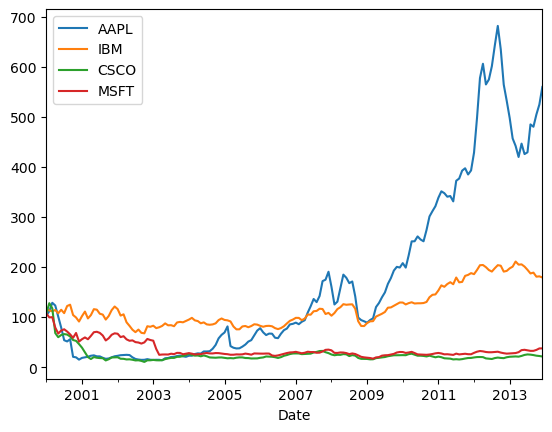

In [39]:
monthly_series_mean.plot()

<Axes: xlabel='Date'>

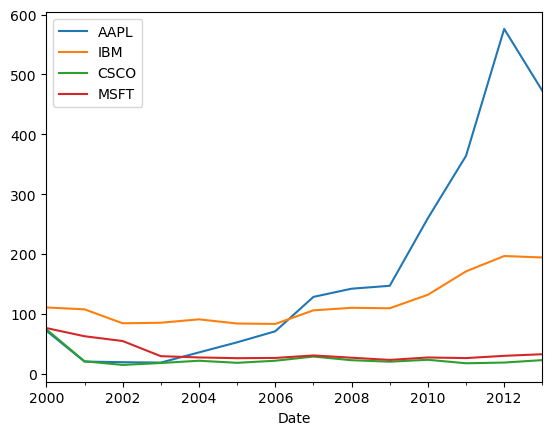

In [40]:
yearly_series_mean = stocks.resample('Y').mean()
yearly_series_mean.plot()

<Axes: xlabel='Date'>

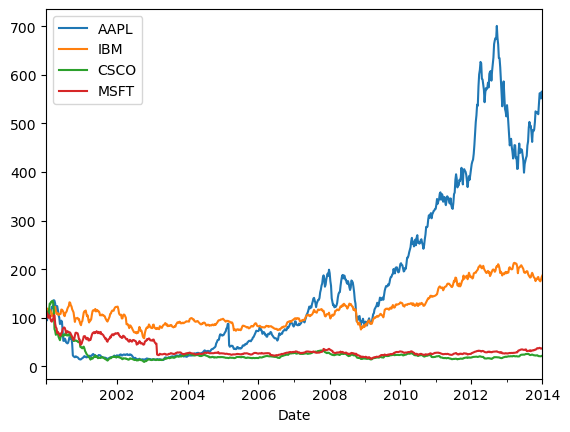

In [41]:
weekly_series_mean = stocks.resample('W').mean()
weekly_series_mean.plot()

<Axes: xlabel='Date'>

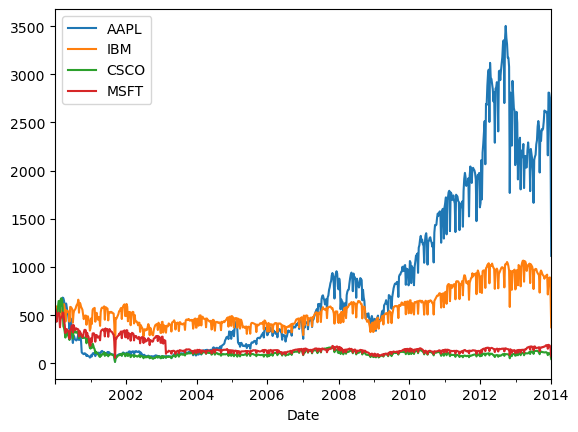

In [42]:
weekly_series_sum = stocks.resample('W').sum()
weekly_series_sum.plot()

In [43]:
MSFT = stocks[['MSFT']]
MSFT

,MSFT
Date,
2000-01-03,116.562500
2000-01-04,112.625000
2000-01-05,113.812500
2000-01-06,110.000000
2000-01-07,111.437500
...,...
2013-12-24,37.080002
2013-12-26,37.439999
2013-12-27,37.290001


In [44]:
MSFT['rolling_weekly'] = MSFT['MSFT'].rolling(window = 7).mean()
MSFT['rolling_monthly'] = MSFT['MSFT'].rolling(window = 30).mean()
MSFT

C:\Users\thanh\AppData\Local\Temp\ipykernel_16896\1979331972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT['rolling_weekly'] = MSFT['MSFT'].rolling(window = 7).mean()
C:\Users\thanh\AppData\Local\Temp\ipykernel_16896\1979331972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT['rolling_monthly'] = MSFT['MSFT'].rolling(window = 30).mean()


,MSFT,rolling_weekly,rolling_monthly
Date,,,
2000-01-03,116.562500,NaN,NaN
2000-01-04,112.625000,NaN,NaN
2000-01-05,113.812500,NaN,NaN
2000-01-06,110.000000,NaN,NaN
2000-01-07,111.437500,NaN,NaN
...,...,...,...
2013-12-24,37.080002,36.677143,37.507667
2013-12-26,37.439999,36.755714,37.510334
2013-12-27,37.290001,36.865715,37.481334


<Axes: xlabel='Date'>

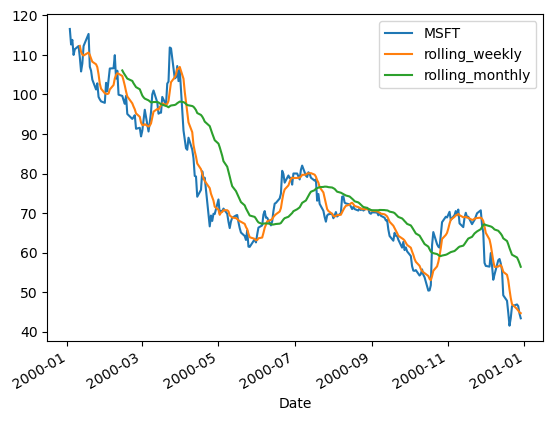

In [45]:
MSFT.loc['2000'].plot()